## 利用训练好的模型测试指定数据集（修改test.prototxt以修改测试集）
$Meringue$
$5/9/2017$

In [1]:
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,16)
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
caffe_root = '/home/meringue/Softwares/caffe-master/'
sys.path.insert(0, caffe_root+'python')
cifar10_root = '/home/meringue/Documents/CaffePy/cifar10py/'
os.chdir(cifar10_root)
import caffe

In [3]:
caffe.set_mode_gpu()
model_def = cifar10_root+'cifar10_caffemodels/model_Alex_BN/cifar10_quick_BN_train_test.prototxt'
# model_def = cifar10_root+'cifar10_caffemodels/model_VGG_quick/cifar10_quick_train_test.prototxt'
caffe_model = cifar10_root+'cifar10_caffemodels/model_Alex_BN/model_Alex_BN/Alex_BN_1_iter_10000.caffemodel.h5'
# caffe_model = cifar10_root+'cifar10_caffemodels/model_VGG_quick/aaa/cifar10_quick_iter_5000.caffemodel.h5'
net = caffe.Net(model_def,caffe_model,caffe.TEST)

In [4]:
[(k,v.data.shape) for k,v in net.blobs.items()]

[('data', (100, 3, 32, 32)),
 ('label', (100,)),
 ('label_cifar_1_split_0', (100,)),
 ('label_cifar_1_split_1', (100,)),
 ('conv1', (100, 32, 32, 32)),
 ('pool1', (100, 32, 16, 16)),
 ('conv2', (100, 32, 16, 16)),
 ('pool2', (100, 32, 8, 8)),
 ('conv3', (100, 64, 8, 8)),
 ('pool3', (100, 64, 4, 4)),
 ('ip1', (100, 64)),
 ('ip2', (100, 10)),
 ('ip2_ip2_0_split_0', (100, 10)),
 ('ip2_ip2_0_split_1', (100, 10)),
 ('accuracy', ()),
 ('loss', ())]

In [5]:
##测试过程
# 参数设置：此处参数由test.prototxt确定（否则会导致测试不完整）
test_batch = 100 # 与test.prototxt中一致
# test_batch = net.blobs['data'].data[0]
test_num = 5000 # 测试集样本数量
test_N = int(np.ceil(test_num/test_batch))
acc_array = np.zeros((test_N,1))


for test_it in range(test_N):
    net.forward() #测试一个batch（batch大小可以在test.prototxt中设置）
    acc_array[test_it] = net.blobs['accuracy'].data # 记录当前batch的准确率（即100个测试样本的准确率）

print 'test accuracy: ', np.average(acc_array)

test accuracy:  0.732599999905


(3, 32, 32)


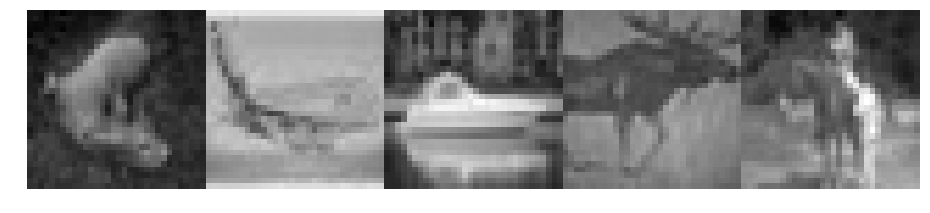

In [6]:
plt.figure()
plt.imshow(net.blobs['data'].data[0:5,0].transpose(1,0,2).reshape(1*32,5*32),cmap = 'gray')
plt.axis('off')
print net.blobs['data'].data[0,:].shape
# plt.imshow(net.blobs['data'].data[0,:])

# plt.figure()
# plt.imshow(net.blobs['data'].data[0,:].transpose(1,0,2).reshape(32,32,3))

(-0.5, 63.5, 15.5, -0.5)

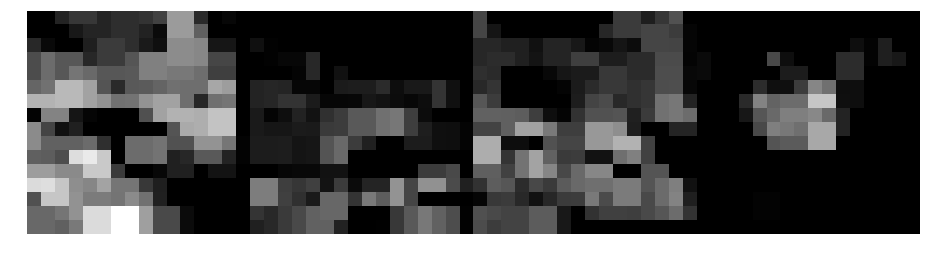

In [7]:
plt.imshow(net.blobs['pool1'].data[11:15,1].transpose(1,0,2).reshape(1*16,4*16),cmap = 'gray')
plt.axis('off')
# print net.blobs['data'].data[0,1]